In [ ]:
import numpy as np
import platform

from Engine.global_clock import GlobalClock, Agent

def my_print(*args):
    if platform.system() == 'Windows':
        print(*args)

In [ ]:
class TimedAgent(Agent):
    def __init__(self, update_rate, start_time):
        super().__init__(update_rate, start_time)
    
    def test_print(self, time):
        if super().check_time(time):
            my_print('A-ha! It is now {time}'.format(time = time))

In [ ]:
GC = GlobalClock(1/30, 2, start=0)
TA1 = TimedAgent(10, 0)

while GC.time <= 5:
    TA1.test_print(GC.time)
    GC.update()

In [ ]:
TA1.check_time(0)

In [ ]:
TA1.next_update_time

In [ ]:
import numpy as np
import pandas as pd

test = np.empty(3)
test[:] = np.NaN
test

In [ ]:
np.array([None, 1])==None

In [ ]:
class FlightPlan(object):
    def __init__(self,
                 leg_num,
                 leg_spd,
                 mode,
                 wpt_start, wpt_start_time,
                 wpt_end, wpt_end_time):
        self.plan = pd.DataFrame({'Leg No.':leg_num, 'Target Speed':leg_spd, 'Mode':mode, 
                                  'Starting Wpt':wpt_start, 'EDT':wpt_start_time, 
                                  'Ending Wpt':wpt_end, 'ETA':wpt_end_time})
        
# testplan = FlightPlan([1,2,3,4], [5,5,5,5], ['Direct', 'Direct', 'Direct', 'Direct'], 
#                      [[0,10,0],[50,0,0],[50,50,0],[70,70,20]],[np.NaN, np.NaN, np.NaN, np.NaN],
#                      [[50,0,0],[50,50,0],[70,70,20],[0,0,0]],[np.NaN, np.NaN, np.NaN, np.NaN] )

testplan = FlightPlan([1,2], [0, 0], ['Hover','Hover'], 
                     [[10,0,0],[10,0,0]],[0, 20],
                     [[10,0,0],[10,0,0]],[20, 40])

testplan.plan

In [ ]:
interval = 0.001

class PID_test(object):
    def __init__(self, PID):
        self.p = PID[0]
        self.i = PID[1]
        self.d = PID[2]
        self.p_err = 0
        self.i_err = 0
        self.d_err = 0
        self.err = 0
        self.interval = interval
    def calc_pseudo_f(self, err):
        self.i_err += err
        self.d_err = (err - self.err)/interval
        self.err = err
        return self.p * err + self.i * self.i_err + self.d_err * self.d
    
num = 100000

x_pos = 10
x_dot = 0
time = 0

x_list = [x_pos]
x_dot_list = [x_dot]
time_list = [time]

x_pos_tgt = 0
x_spd_tgt = 10

# Hover controller
# controller = PID_test([1, 0, 0.8])
# Speed controller
controller = PID_test([1, 0, 0.8])

for i in range(num):
    # error = -(x_pos - x_pos_tgt)
    error = -(x_dot - x_spd_tgt)
    accel = controller.calc_pseudo_f(error)
    x_pos += interval * x_dot
    x_dot += accel * interval
    time += interval
    
    x_list.append(x_pos)
    x_dot_list.append(x_dot)
    time_list.append(time)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].plot(time_list, x_list)
ax[0].set_title('Position trace')

ax[1].plot(time_list, x_dot_list)
ax[1].set_title('Velocity trace')

In [ ]:
import pandas as pd

df = pd.DataFrame({'a':[1 ,2], 'b':[3, 4]})
df.iloc[0]['a']

In [ ]:
class state(object):
    def __init__(self):
        self.cat = 1
        # self.trajectory = []
    def return_dict(self):
        return self.__dict__ 
    def update(self):
        self.trajectory.append(self.return_dict().copy())

cat = state()

cat.return_dict()

In [ ]:
df.copy()

In [ ]:
a = [0, 1]
df = pd.DataFrame({'a':a})
df

In [ ]:
a[0] = 1
a

In [ ]:
df

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_calculator(A, B, C):
    """Calculates lambda parameter given 3 points.
    A --> Starting wpt
    B --> Ending wpt
    C --> Aircraft position"""
    CA = C-A
    BA = B-A
    l = np.dot(CA, BA)/np.dot(BA, BA)
    return l

def line_generator(A, B):
    BA = B - A
    return lambda x: A + x*BA

In [2]:
point_a = np.array([0,0,0])
point_b = np.array([2,2,0])
point_c = np.array([-3,1,0])

points_list = [point_a, point_b]

gen_AB = line_generator(point_a, point_b)
# gen_AB(1)

lambda_param = lambda_calculator(point_a, point_b, point_c)
lambda_point = gen_AB(lambda_param)

points_list2 = [lambda_point, point_c]

gen_CL = line_generator(point_c, lambda_point)
               
xyz = np.array([])
xyz2 = np.array([])
genlist = np.arange(0.05, 1, 0.05)
for ds in genlist:
    xyz = np.append(xyz, gen_AB(ds))
    xyz2 = np.append(xyz2, gen_CL(ds))

xyz = xyz.reshape(len(genlist), 3)
xyz2 = xyz2.reshape(len(genlist), 3)

In [3]:
# xyz = np.array([])
# xyz = np.append(xyz, point_a)
# xyz = np.append(xyz, point_a)
# xyz = np.append(xyz, point_b)
# xyz = np.append(xyz, point_b)
# xyz = xyz.reshape(4, 3)

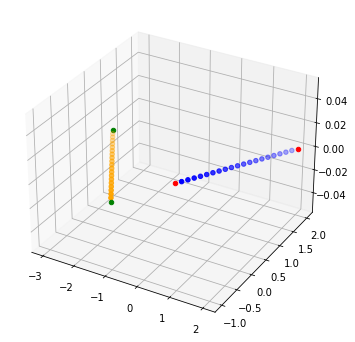

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')


ax.scatter(xyz[:,0], 
           xyz[:,1], 
           xyz[:,2], c='b')

ax.scatter(xyz2[:,0], 
           xyz2[:,1], 
           xyz2[:,2], c='orange')

for wpt in points_list:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    
for wpt in points_list2:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='g')

In [9]:
CL = point_c - lambda_point
BA = point_b - point_a

print('CL dot BA: ', round(np.dot(CL, BA), 6))
print(lambda_point.round(decimals=4))
print('Lambda param: {lambda_p}'.format(lambda_p = round(lambda_param, 4)))

CL dot BA:  0.0
[-1. -1.  0.]
Lambda param: -0.5


In [10]:
class PseudoForceCalculator(object):
    """Calculates a pseudo-force/acceleration in transformed coordinates corresponding,
    similar to Frenet-Serret frame. This "force" will then be transformed back into the body-frame. """

    def __init__(self, p, i, d, interval):
        self.p = p
        self.i = i
        self.d = d
        self.interval = interval
        self.err = np.zeros(3)
        self.d_err = np.zeros(3)
        self.i_err = np.zeros(3)

    def calculate(self, err, d_err=None):
        self.i_err += err
        self.d_err = (err - self.err) / self.interval
        self.err = err
        if d_err is None:
            return -(self.p * self.err + self.i * self.i_err + self.d * self.d_err)
        else:
            return -(self.p * self.err + self.i * self.i_err + self.d * d_err)

    def reset_i_err(self):
        self.i_err = 0
        
        
pid_P2P_vertical = np.array([0.5, 0, 2])
P2P_vertical_pseudo_calculator = PseudoForceCalculator(pid_P2P_vertical[0],
                                                       pid_P2P_vertical[1],
                                                       pid_P2P_vertical[2],
                                                       0.01)

In [11]:
P2P_vertical_pseudo_calculator.calculate(0, 0)

array([-0., -0., -0.])

In [2]:
isinstance(None, type(None))

True

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R

a = np.array([1,6])
b = np.array([2,9])

a*b



array([ 2, 54])

In [18]:
cur_rotation = R.from_euler('xyz', np.array([np.pi/4, np.pi/4, 0])).as_matrix()
cur_rotation

array([[ 7.07106781e-01,  5.00000000e-01,  5.00000000e-01],
       [ 5.55111512e-17,  7.07106781e-01, -7.07106781e-01],
       [-7.07106781e-01,  5.00000000e-01,  5.00000000e-01]])

In [19]:
cat = np.dot(cur_rotation, np.array([0,0,1]))
cat

array([ 0.5       , -0.70710678,  0.5       ])

In [21]:
attitude = np.arcsin(np.sqrt(cat[0]**2 + cat[1]**2))
attitude*180/np.pi

59.999999999999986

In [22]:
1.2 * 9.81 * np.tan(np.pi/3)

20.389702106700817

In [1]:
import numpy as np
import pandas as pd
from CrossPlatformDev import my_print
from Engine.GlobalClock import Agent, TimeTriggeredAgent
from Engine.TrackingSystem import TrackingUnit

class SingleTrajectory(object):
    """Stores info for a single A/C trajectory. Main methods are to help retrieve/extrapolate data 
    from the stored trajectory. """
    def __init__(self, ident):
        self.ident = ident
        self.trajectory = []
    
    def update_trajectory(self, transmit_time, received_time, est_pos, est_vel):
        self.trajectory.append(np.array([transmit_time, received_time, *est_pos, *est_vel]))
        
    def last_known_pos(self):
        if len(self.trajectory) > 0:
            return self.trajectory[-1][2:5]
    
    def last_known_vel(self):
        if len(self.trajectory) > 0:
            return self.trajectory[-1][5:8]
    
    def last_transmitted_time(self):
        if len(self.trajectory) > 0:
            return self.trajectory[-1][0]
    
    def last_received_time(self):
        if len(self.trajectory) > 0:
            return self.trajectory[-1][1]
        
    def extrapolate_pos(self, extrapolated_time):
        if len(self.trajectory) > 0:
            return (extrapolated_time - self.trajectory[-1][0]) * self.trajectory[-1][5:8] + self.trajectory[-1][2:5]
        
    
class GroundStation(TimeTriggeredAgent):
    def __init__(self, update_rate, start_time, phase_delay=0):
        """Class that handles updating of A/C trajectories. 
        Note: keys for self.tracked_objects and self.trajectories MUST be the same. 
        They should both refer to AC_ident."""
        super().__init__(update_rate, start_time, phase_delay)
        self.tracked_objects = {}
        self.trajectories = {}
        
    def add_airborne_tracker(self, AC_ident, tracking_unit):
        """Adds new tracking unit to synchronise info with ground tracking station."""
        self.tracked_objects[AC_ident] = tracking_unit
        self.trajectories[AC_ident] = SingleTrajectory(AC_ident)
        
    def remove_airborne_tracker(self, AC_ident):
        """Note: trajectory is NOT deleted. """
        del self.tracked_objects[AC_ident]
        
    def track_and_update_trajectories(self, actual_time):
        """Note: rec time generated by the tracking unit is overwritten by actual time of the 
        ground system when data is appended to trajectory."""
        for AC_ident, tracking_unit in self.tracked_objects:
            if len(tracking_unit.transmission_time) > 0:
                if super().check_time_and_trigger(actual_time, tracking_unit.received_time):
                    trans_time, rec_time1, est_pos, est_vel = tracking_unit.pop_from_queue()
                    rec_time = actual_time
                    self.trajectories[AC_ident].update_trajectory(trans_time, rec_time, est_pos, est_vel)

In [3]:
if 0:
    print('0 is not false-y')
else:
    print('0 is false-y')

0 is false-y


In [26]:
test_array = []
pos = np.array([1,1,1])
vel = np.array([-2,-2,-2])
t1 = 2.5
t2 = 3.5
test_array.append(np.array([t1, t1, *pos, *vel]))
# test_array.append(np.array([t2, t2, *pos, *vel]))
test_array

[array([ 2.5,  2.5,  1. ,  1. ,  1. , -2. , -2. , -2. ])]

In [27]:
np.array(test_array)

array([[ 2.5,  2.5,  1. ,  1. ,  1. , -2. , -2. , -2. ]])

In [28]:
test_array[-1][5:8]

array([-2., -2., -2.])

In [5]:
test_dict = {'AC1':10, 'AC2':20}
del test_dict['AC1']
del test_dict['AC2']
test_dict

{}

In [3]:
test_dict['AC1'] = 100
test_dict

{'AC2': 20, 'AC1': 100}

In [8]:
for key, val in test_dict.items():
    print('Hi')

In [14]:
try:
    test_dict.keys()[5]
except TypeError:
    print('Lol TypeError')

Lol TypeError


In [93]:
import numpy as np
import pandas as pd
from CrossPlatformDev import my_print
from Engine.GlobalClock import Agent, TimeTriggeredAgent
from Engine.TrackingSystem import TrackingUnit

class ConflictDetector(Agent):
    def __init__(self, update_rate, start_time, phase_delay=0):
        super().__init__(update_rate, start_time, phase_delay)
        self.conflict_definitions = {}
        self.r_hor_sq = None
        self.vert_dist = None
        self.tau_DMOD = {}
        self.taus = {}

    def add_conflict_definition(self, condition_tag, condition):
        conflict_history = {'condition': condition, 'conflict_start_time': [], 'conflict_end_time': [],
                            'is_in_conflict': False}
        self.conflict_definitions[condition_tag] = conflict_history
        
    def add_DMOD(self, DMOD_tag, DMOD):
        self.tau_DMOD[DMOD_tag] = DMOD
        if DMOD not in self.tau_DMOD.values():
            self.taus[DMOD_tag] = None

    def update_r_hor_sq_vert_dist(self, AC1_Pos, AC2_Pos):
        self.r_hor_sq = (AC1_Pos - AC2_Pos)[0]**2 + (AC1_Pos - AC2_Pos)[1]**2
        self.vert_dist = abs((AC1_Pos - AC2_Pos)[2])

    def gen_distance_condition(self, hor_dist_min, vert_dist_min):
        hor_r_min_sq = hor_dist_min**2

        def check():
            return (self.r_hor_sq <= hor_r_min_sq) & (self.vert_dist <= vert_dist_min)
        return check

    def conflict_check(self, time):
        if super().check_time(time):
            my_print('Time is %.1f, r_hor_sq is %.3f and vert_dist is %.3f'%(time, self.r_hor_sq, self.vert_dist))
            my_print('Time is %.1f, taus: '%(time), self.taus)
            for condition_history in self.conflict_definitions.values():
                if (not condition_history['is_in_conflict']) & condition_history['condition']():
                    condition_history['is_in_conflict'] = True
                    condition_history['conflict_start_time'].append(time)
                elif condition_history['is_in_conflict'] & (not condition_history['condition']()):
                    condition_history['is_in_conflict'] = False
                    condition_history['conflict_end_time'].append(time)

    def get_earliest_conflict_start_time(self, conflict_tag):
        if len(self.conflict_definitions[conflict_tag]['conflict_start_time']) > 0:
            return min(self.conflict_definitions[conflict_tag]['conflict_start_time'])
        else:
            return None

    def get_latest_conflict_end_time(self, conflict_tag):
        if len(self.conflict_definitions[conflict_tag]['conflict_end_time']) > 0:
            return max(self.conflict_definitions[conflict_tag]['conflict_end_time'])
        else:
            return None

    def history_of_conflict(self, conflict_tag):
        return len(self.conflict_definitions[conflict_tag]['conflict_start_time']) > 0
    
    def calculate_tau(self, AC1_Pos, AC2_Pos, AC1_Vel, AC2_Vel, DMOD):
        r_hor = (AC2_Pos - AC1_Pos).copy()
        r_hor[2] = 0
        hor_dist = np.linalg.norm(r_hor)
        if hor_dist <= DMOD:
            tau_mod_hor = 0
        else:
            r_dot_hor = (1/hor_dist)* np.dot(r_hor, AC2_Vel-AC1_Vel)
            if r_dot_hor == 0:
                tau_mod_hor = 999
            else:
                tau_mod_hor = -(hor_dist**2 - DMOD**2)/(hor_dist * r_dot_hor) 
        vert_dist = (AC2_Pos - AC1_Pos)[2]
        vert_speed = (AC2_Vel - AC1_Vel)[2]
        if vert_speed == 0:
            tau_vert = 999
        else:
            tau_vert = -vert_dist/(vert_speed)
        return tau_mod_hor, tau_vert
    
    def update_taus(self, AC1_Pos, AC2_Pos, AC1_Vel, AC2_Vel):
        """Note: Make sure update_taus is called BEFORE condition is checked."""
        for DMOD_tag, DMOD in self.tau_DMOD.items():
            self.taus[DMOD_tag] = self.calculate_tau(AC1_Pos, AC2_Pos, AC1_Vel, AC2_Vel, DMOD)
            
    def gen_tau_mod_condition(self, tau_mod_min, tau_vert_min, vert_min, DMOD):
        """Note: Make sure update_taus is called BEFORE condition is checked."""
        self.add_DMOD(str(DMOD), DMOD)
            
        def check():
            tau_mod, tau_vert = self.taus[str(DMOD)]
            return (0 <= tau_mod < tau_mod_min) & ((0 <= tau_vert < tau_vert_min) | (self.vert_dist <= vert_min))
        return check

In [110]:
pos_a = np.array([25,0,11])
pos_b = np.array([0,0,0])

pos_c = np.array([10,0,9])
pos_d = np.array([0,0,0])


timelist = [0,1,2]
alist = [pos_a.copy(), pos_a.copy(), pos_a.copy()]
blist = [pos_b.copy(), pos_b.copy(), pos_b.copy()]

vel1 = np.array([1,0,0])
vel2 = np.array([1,0,0])
vel3 = np.array([1,0,1])

vel_list_1 = [vel1.copy(), vel1.copy(), vel1.copy()]
vel_list_2 = [vel2.copy(), vel2.copy(), vel3.copy()]

t = 3
for i in range(4):
    if i%2 == 0:
        alist.append(pos_c)
        blist.append(pos_d)
    else:
        alist.append(pos_c)
        blist.append(pos_d)
    timelist.append(t)
    vel_list_1.append(vel1.copy())
    vel_list_2.append(vel2.copy())
    t += 1

# alist.append(pos_c)
# blist.append(pos_d)
# timelist.append(time + 1)
alist

[array([25,  0, 11]),
 array([25,  0, 11]),
 array([25,  0, 11]),
 array([10,  0,  9]),
 array([10,  0,  9]),
 array([10,  0,  9]),
 array([10,  0,  9])]

In [111]:
CD = ConflictDetector(1, 0)
#CD.update_r_hor_sq_vert_dist(pos_c.copy(), pos_d.copy())
CD.add_conflict_definition('BIG_NMAC_Rad', CD.gen_distance_condition(10, 10))
# CD.add_conflict_definition('small_NMAC_Rad', CD.gen_distance_condition(10, 5))

# CD.add_conflict_definition('xxx_tau', CD.gen_tau_mod_condition(tau_mod_min, tau_vert_min, vert_min, DMOD))
CD.add_conflict_definition('tau_Rad', CD.gen_tau_mod_condition(25, 25, 10, 10))
# CD.conflict_check(0)

for idx in range(len(timelist)):
    CD.update_r_hor_sq_vert_dist(alist[idx], blist[idx])
    CD.update_taus(alist[idx], blist[idx], vel_list_1[idx], vel_list_2[idx])
    CD.conflict_check(timelist[idx])
    
CD.conflict_definitions

Time is 0.0, r_hor_sq is 625.000 and vert_dist is 11.000
Time is 0.0, taus:  {'10': (999, 999)}
Time is 1.0, r_hor_sq is 625.000 and vert_dist is 11.000
Time is 1.0, taus:  {'10': (999, 999)}
Time is 2.0, r_hor_sq is 625.000 and vert_dist is 11.000
Time is 2.0, taus:  {'10': (999, 11.0)}
Time is 3.0, r_hor_sq is 100.000 and vert_dist is 9.000
Time is 3.0, taus:  {'10': (0, 999)}
Time is 4.0, r_hor_sq is 100.000 and vert_dist is 9.000
Time is 4.0, taus:  {'10': (0, 999)}
Time is 5.0, r_hor_sq is 100.000 and vert_dist is 9.000
Time is 5.0, taus:  {'10': (0, 999)}
Time is 6.0, r_hor_sq is 100.000 and vert_dist is 9.000
Time is 6.0, taus:  {'10': (0, 999)}


{'BIG_NMAC_Rad': {'condition': <function __main__.ConflictDetector.gen_distance_condition.<locals>.check()>,
  'conflict_start_time': [3],
  'conflict_end_time': [],
  'is_in_conflict': True},
 'tau_Rad': {'condition': <function __main__.ConflictDetector.gen_tau_mod_condition.<locals>.check()>,
  'conflict_start_time': [3],
  'conflict_end_time': [],
  'is_in_conflict': True}}

In [112]:
CD.get_earliest_conflict_start_time('tau_Rad')

3

In [113]:
CD.get_latest_conflict_end_time('tau_Rad')

In [114]:
CD.history_of_conflict('tau_Rad')

True

In [16]:
cat = 1, 2
cat

(1, 2)

In [92]:
((0 <= 11 < 25) | (11 <= 10))

True

In [1]:
((0 <= 11 < 25) | 11 <= 10)

False

In [3]:
True | 11

11

In [12]:
for i in range(10):
    print('WC1' + chr(97+i))

WC1a
WC1b
WC1c
WC1d
WC1e
WC1f
WC1g
WC1h
WC1i
WC1j


In [13]:
from MonteCarlo.TwoAircraftEncounter.ScenarioMP import get_param

get_param()

,Unnamed: 0,Run,GlobalPhysicsUpdateRate,GlobalSimStopTime,Cruise_Leg_Time,Num_Legs,WindUpdateRate,Wind_auto_x,Wind_auto_y,Wind_auto_z,...,AC2_Start_Time,AC2_PosUpdateRate,AC2_VelUpdateRate,AC2_AccelUpdateRate,AC2_AirSpdSensorUpdateRate,AC2_TrackingUnit_UpdateRate,AC2_TrackingUnit_Pos_Quant,AC2_TrackingUnit_Vel_Quant,AC2_TrackingUnit_Avail,AC2_Latency
0,0,0,240,150,30,4,5,0.8,0,0,...,0,10,10,120,120,2,0,0,0.5,0.5


In [1]:
import numpy as np
import pandas as pd

np.random.uniform(0, 10, size=10)

array([7.49981947, 9.0940938 , 5.32205246, 4.00011685, 4.85797716,
       1.103895  , 3.28036998, 5.54188869, 9.97101348, 5.08485765])

In [6]:
num_runs = 10
np.ones(num_runs) * 10

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [8]:
AC1_HDG = 0 * np.ones(num_runs)
AC1_HDG = AC1_HDG * np.pi/180
AC1_HDG

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
np.random.uniform(150, 250, size=num_runs) * -np.cos(AC1_HDG)

array([-197.07921948, -216.6687173 , -206.6034694 , -228.69982147,
       -230.06152997, -150.38629786, -154.51458799, -184.98654272,
       -158.63893596, -177.47766156])

In [13]:
np.random.normal(0, 10, size=num_runs)

array([-12.43321044,  -4.37121187, -12.78089937, -21.02990156,
         0.45048643,   2.82106992,  -0.02299513,  -6.83139152,
         0.62048484, -11.13081397])

(array([  4.,  20.,  68., 182., 283., 254., 127.,  50.,   9.,   3.]),
 array([-33.87969864, -26.78611661, -19.69253459, -12.59895257,
         -5.50537054,   1.58821148,   8.68179351,  15.77537553,
         22.86895755,  29.96253958,  37.0561216 ]),
 <BarContainer object of 10 artists>)

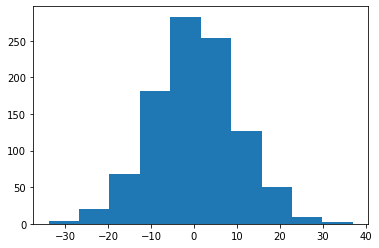

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(np.random.normal(0, 10, size=1000))

In [17]:
np.arange(0, num_runs)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
num_runs

10

In [18]:
np.log(np.arange(0, num_runs))

<ipython-input-18-0befad8358c5>:1: RuntimeWarning: divide by zero encountered in log
  np.log(np.arange(0, num_runs))


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [22]:
np.exp(np.arange(0, num_runs)).round(1)

array([1.0000e+00, 2.7000e+00, 7.4000e+00, 2.0100e+01, 5.4600e+01,
       1.4840e+02, 4.0340e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])

In [21]:
isinstance(np.exp(np.arange(0, num_runs)), type(np.array([])))

True

In [29]:
def calc_diameter(mass):
    """Data for this function obtained from log-log plot of popular DJI quadrotors"""
    if isinstance(mass, type(np.array([]))):
        diameter = (np.random.uniform(0.8, 1.2, size=len(mass)) * np.exp((0.3878 * np.log(mass) + 2.1387))).round(1)
    else:
        diameter = round(np.random.uniform(0.8, 1.2) * np.exp((0.3878 * np.log(mass) + 2.1387)), 1)
    return diameter

calc_diameter(1.2)

9.3

In [30]:
abs(np.array([1, -1]))

array([1, 1])

In [32]:
np.arccos(np.array([1,0.5,0.777, -1]))

array([0.        , 1.04719755, 0.68091031, 3.14159265])

In [3]:
import numpy as np
import pandas as pd

np.cross(np.array([0,0,1]), np.array([0,1,0]))

array([-1,  0,  0])

In [15]:
runs = 100000

x_auto = 0.994
y_auto = 0.994


GPS_Pos_Error_Hor_Std = 3.5 # (radial)
GPS_Pos_Error_Hor_Std1 = (GPS_Pos_Error_Hor_Std)/np.sqrt(0.5*(4-np.pi)) # Check formula! 
GPS_Pos_Error_Hor_Std2 = (GPS_Pos_Error_Hor_Std/2)/np.sqrt(0.5*(4-np.pi)) # Pls chk formula before running!

x1_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)
y1_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)
x2_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)
y2_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)

x1_err_l = []
y1_err_l = []
x2_err_l = []
y2_err_l = []
r1_err_l = []
r2_err_l = []

for i in range(runs):
    x1_err = x_auto * x1_err + np.random.normal(0, GPS_Pos_Error_Hor_Std1 * np.sqrt(1 - x_auto**2))
    x1_err_l.append(x1_err)
    y1_err = y_auto * y1_err + np.random.normal(0, GPS_Pos_Error_Hor_Std1 * np.sqrt(1 - y_auto**2))
    y1_err_l.append(y1_err)
    r1_err_l.append(np.sqrt(x1_err**2 + y1_err**2))
    x2_err = x_auto * x2_err + np.random.normal(0, GPS_Pos_Error_Hor_Std2 * np.sqrt(1 - x_auto**2))
    x2_err_l.append(x2_err)
    y2_err = y_auto * y2_err + np.random.normal(0, GPS_Pos_Error_Hor_Std2 * np.sqrt(1 - y_auto**2))
    y2_err_l.append(y2_err)
    r2_err_l.append(np.sqrt(x2_err**2 + y2_err**2))
    
print('STD_Formula_1, r std: %.3f, set value: %.1f'%(np.array(r1_err_l).std(), GPS_Pos_Error_Hor_Std))
print('STD_Formula_2, r std: %.3f, set value: %.1f'%(np.array(r2_err_l).std(), GPS_Pos_Error_Hor_Std))
print('STD_x_val_1: %.3f, set value: %.3f'%(np.array(x1_err_l).std(), GPS_Pos_Error_Hor_Std1))
print('STD_x_val_2: %.3f, set value: %.3f'%(np.array(x2_err_l).std(), GPS_Pos_Error_Hor_Std2))

STD_Formula_1, r std: 3.529, set value: 3.5
STD_Formula_2, r std: 1.728, set value: 3.5
STD_x_val_1: 5.178, set value: 5.342
STD_x_val_2: 2.675, set value: 2.671
